In [192]:
import jax
from cft import *
import jax.numpy as jnp
import matplotlib.pyplot as plt
from tqdm import tqdm
import optax

from functools import partial


In [193]:
def boots(beta,c,deltas, opt_fn, opt_state, steps=100):
    """ finds deltas

        Params:
        beta - random point for beta
        c - central charge
        deltas - intitalised deltas
        opt_fn - optimization function e.g. Adam
        opt_state - initial state

        Returns:
        losses, deltas, state

    """
    @jit
    def loss_function(deltas):
        identy = vmap(reduced_partition_function_spinless, in_axes=(0,0,None), out_axes=0)(deltas,beta,c)
        transformed = vmap(reduced_partition_function_spinless, in_axes=(0,0,None), out_axes=0)(deltas,1/beta,c)
        return jnp.mean((identy-transformed)**2) # mean squared loss

    losses = []
    for _ in tqdm(range(steps)):
        # loss and gradients calulated with 
        loss, grads = jax.value_and_grad(loss_function)(deltas) 
        updates, opt_state = opt_fn(grads, opt_state)
        deltas += updates
        losses.append(loss) 

    return jnp.stack(losses), deltas, opt_state


## Some Experiments

With c = 1, we hope to get delta = 1 

1. Tried different distributions for beta: sampled uniformly in [0.5,1.5], sampled normally around 1
2. Different learning rates for optimizer


What works is: 2 training sub-routines:
1st-routine with learing rate 0.05, beta in uniform[3,4]
2nd-routine with learing rate 0.005, beta in uniform[3,4]

100%|██████████| 1000/1000 [00:02<00:00, 364.45it/s]


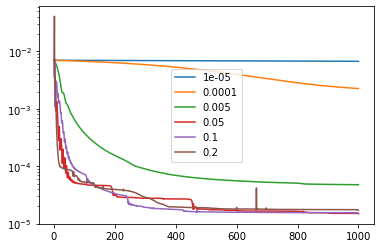

In [270]:
batch_size = 128
rng = random.PRNGKey(0)
keys = random.split(rng, 2)
beta = random.uniform(keys[0], (batch_size,)) + 1/2 #  sampled uniformly in [0.5,1.5]
deltas = random.uniform(keys[1], (batch_size, 1))*5
c = 1
step=1000

# test for different learning rates
for lr in [1e-5,1e-4,5e-3,5e-2, 1e-1, 0.2]:
    adam = optax.adam(learning_rate=lr)
    losses, learned_deltas, _ = boots(beta, c, deltas, opt_fn=adam.update, opt_state=adam.init(deltas),steps=step)
    steps = np.linspace(1,step,step)
    plt.plot(steps,losses,label=f"{lr}")
    plt.yscale("log")
    plt.legend()

    # print(learned_deltas)

100%|██████████| 1000/1000 [00:02<00:00, 380.84it/s]


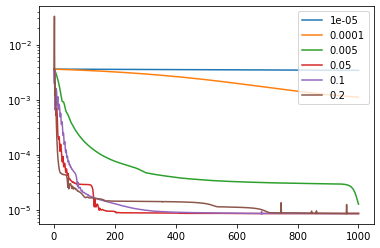

In [241]:
batch_size = 128
rng = random.PRNGKey(0)
keys = random.split(rng, 2)
beta = random.normal(keys[0], (batch_size,))*0.2 + 1 # takes points normally distributed around beta = 1 with variancee 0.2
deltas = random.uniform(keys[1], (batch_size, 1))*5
c = 1
step=1000

# test for different learning rates
for lr in [1e-5,1e-4,5e-3,5e-2, 1e-1, 0.2]:
    adam = optax.adam(learning_rate=lr)
    losses, learned_deltas, _ = boots(beta, c, deltas, opt_fn=adam.update, opt_state=adam.init(deltas),steps=step)
    steps = np.linspace(1,step,step)
    plt.plot(steps,losses,label=f"{lr}")
    plt.yscale("log")
    plt.legend()

    # print(learned_deltas)

100%|██████████| 700/700 [00:03<00:00, 193.87it/s]


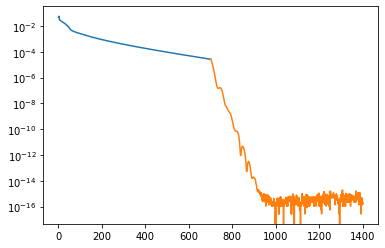

In [261]:
batch_size = 128
rng = random.PRNGKey(0)
keys = random.split(rng, 2)
beta = random.uniform(keys[0], (batch_size,)) + 3 # takes points normally distributed around beta = 1
deltas = random.uniform(keys[1], (batch_size, 1))*5
c = 1
step=700

adam = optax.adam(learning_rate=0.05)
losses, deltas, _ = boots(beta, c, deltas, opt_fn=adam.update, opt_state=adam.init(deltas),steps=step)
steps = np.linspace(1,step,step)
plt.plot(steps,losses)
plt.yscale("log")

step=700
beta = random.uniform(keys[0], (batch_size,)) + 3

adam = optax.adam(learning_rate=0.005)
losses, deltas, _ = boots(beta, c, deltas, opt_fn=adam.update, opt_state=adam.init(deltas),steps=step)
steps = np.linspace(step+1,2*step,step)
plt.plot(steps,losses)
plt.yscale("log")

100%|██████████| 700/700 [00:02<00:00, 334.12it/s]


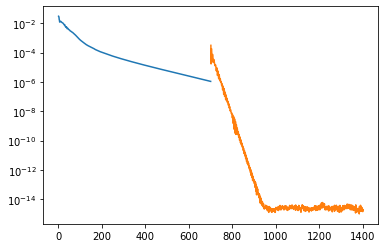

In [269]:
batch_size = 128
rng = random.PRNGKey(0)
keys = random.split(rng, 2)
beta = random.uniform(keys[0], (batch_size,)) + 2# takes points normally distributed around beta = 1
deltas = random.uniform(keys[1], (batch_size, 1))*5
c = 1
step=700

adam = optax.adam(learning_rate=0.05)
losses, deltas, _ = boots(beta, c, deltas, opt_fn=adam.update, opt_state=adam.init(deltas),steps=step)
steps = np.linspace(1,step,step)
plt.plot(steps,losses)
plt.yscale("log")

step=700
beta = random.uniform(keys[0], (batch_size,)) + 4

adam = optax.adam(learning_rate=0.005)
losses, deltas, _ = boots(beta, c, deltas, opt_fn=adam.update, opt_state=adam.init(deltas),steps=step)
steps = np.linspace(step+1,2*step,step)
plt.plot(steps,losses)
plt.yscale("log")

100%|██████████| 1000/1000 [00:02<00:00, 402.15it/s]


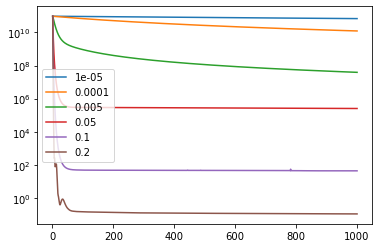

In [293]:
batch_size = 128
rng = random.PRNGKey(0)
keys = random.split(rng, 2)
beta = random.uniform(keys[0], (batch_size,)) + 2 # takes points normally distributed around beta = 1 with variancee 0.2
deltas = random.uniform(keys[1], (batch_size, 6))*10
c = 12
step=1000

# test for different learning rates
for lr in [1e-5,1e-4,5e-3,5e-2, 1e-1, 0.2]:
    adam = optax.adam(learning_rate=lr)
    losses, learned_deltas, _ = boots(beta, c, deltas, opt_fn=adam.update, opt_state=adam.init(deltas),steps=step)
    steps = np.linspace(1,step,step)
    plt.plot(steps,losses,label=f"{lr}")
    plt.yscale("log")
    plt.legend()

100%|██████████| 2000/2000 [00:05<00:00, 379.43it/s]


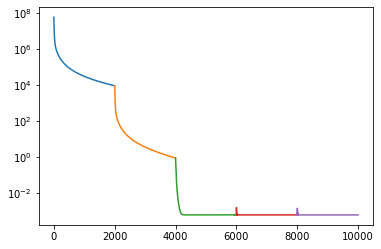

In [308]:
deltas = random.uniform(keys[1], (batch_size, 6))*10

for epoch in range(5):
    batch_size = 128
    rng = random.PRNGKey(0)
    keys = random.split(rng, 3)
    choice = random.choice(keys[2], jnp.arange(1,4))
    beta = random.uniform(keys[0], (batch_size,)) + 1/choice
    c = 12
    step=2000
    lr = 0.3

    if epoch < 2:
        lr = lr/50
    else:
        lr = lr/100
        # beta = random.normal(keys[0], (batch_size,)) + 4

    adam = optax.adam(learning_rate=lr)
    losses, deltas, _ = boots(beta, c, deltas, opt_fn=adam.update, opt_state=adam.init(deltas),steps=step)
    steps = np.linspace(epoch*step+1,(epoch+1)*step,step)
    plt.plot(steps,losses)
    plt.yscale("log")

    

DeviceArray([1, 2, 3, 4], dtype=int32)

In [313]:
from flax import linen as nn

class LSTMOptimizer(nn.Module):
    hidden_units: int = 20

    def setup(self):
        self.lstm1 = nn.recurrent.LSTMCell()
        self.lstm2 = nn.recurrent.LSTMCell()
        self.fc = nn.Dense(1)

    def __call__(self, gradient, state):
        # gradients of optimizee do not depend on optimizer
        gradient = jax.lax.stop_gradient(gradient)

        # expand parameter dimension to extra batch dimension so that network
        # is "coodinatewise"
        gradient = gradient[..., None]

        carry1, carry2 = state
        carry1, x = self.lstm1(carry1, gradient)
        carry2, x = self.lstm2(carry2, x)
        update = self.fc(x)
        update = update[..., 0]  # remove last dimension
        return update, (carry1, carry2)

    def init_state(self, rng, params):
        return (
            nn.LSTMCell.initialize_carry(rng, params.shape, self.hidden_units),
            nn.LSTMCell.initialize_carry(rng, params.shape, self.hidden_units),
        )

example_input = jnp.zeros((batch_size, 6))

lstm_opt = LSTMOptimizer()
lstm_state = lstm_opt.init_state(rng, example_input)
params = lstm_opt.init(rng, example_input, lstm_state)

meta_opt = optax.adam(learning_rate=0.01)
meta_opt_state = meta_opt.init(params)

@jax.jit
def train_step(params, beta, c, deltas, state):
    def loss_fn(params):
        update = partial(lstm_opt.apply, params)
        losses, deltas_, state_ = boots(beta, c, deltas, update, state, steps=100)
        return losses.sum(), (deltas_, state_)

    (loss, (deltas_, state_)), grads = jax.value_and_grad(loss_fn, has_aux=True)(params)
    return loss, grads, deltas_, state_



In [316]:
for step in range(1000):

    batch_size = 128
    rng = random.PRNGKey(0)
    keys = random.split(rng, 3)
    choice = random.choice(keys[1], jnp.arange(1,4))
    beta = random.uniform(keys[0], (batch_size,)) + 1/choice
    deltas = random.uniform(keys[1], (batch_size, 6))*10
    c = 12
    lstm_state = lstm_opt.init_state(rng, deltas)

    for unrolls in range(5):
        loss, grads, deltas, lstm_state = train_step(params, beta, c, deltas, lstm_state)
        updates, meta_opt_state = meta_opt.update(grads, meta_opt_state)
        params = optax.apply_updates(params, updates)


100%|██████████| 100/100 [00:52<00:00,  1.89it/s]


NameError: free variable 'delta_' referenced before assignment in enclosing scope